In [49]:
# Initialize Otter
import otter
grader = otter.Notebook("lab11.ipynb")

# Lab 11: Climate Part 2

Welcome to Lab 11!

This Lab will see you complete your analysis from the previous lab by assessing the impact of drought. 



**Getting help on lab**: Whenever you feel stuck or need some further clarification, find a GSI or tutor, and they'll be happy to help!

Here are the policies for getting full credit:

1. For students enrolled in in-person <span style="color: #BC412B">**Regular Labs**</span>, you will receive lab credit by **attending** lab section and making significant progress on the lab notebook. You **<span style="text-decoration: underline">do not</span>** need to submit this assignment to Gradescope.

2. For students enrolled in <span style="color: #04888B">**Self-Service Lab**</span>, you will receive lab credit by **completing** the notebook, passing the test cases, and **submitting** it to Gradescope by **11:59pm on the due date**.

**Submission**: Once you’re finished, run all cells besides the last one, select File > Save Notebook, and then execute the final cell. The result will contain a zip file that you can use to submit on Gradescope.

Let's begin by setting up the tests and imports by running the cell below.

In [50]:
# Run this cell to set up the notebook, but please don't change it.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

import warnings
warnings.simplefilter('ignore')

# Part 2: Drought

According to the [United States Environmental Protection Agency](https://www.epa.gov/climate-indicators/southwest), "Large portions of the Southwest have experienced drought conditions since weekly Drought Monitor records began in 2000. For extended periods from 2002 to 2005 and from 2012 to 2020, nearly the entire region was abnormally dry or even drier." 

Assessing the impact of drought is challenging with just city-level data because so much of the water that people use is transported from elsewhere, but we'll explore the data we have and see what we can learn.

Let's first take a look at the precipitation data in the Southwest region. The `southwest.csv` file contains total annual precipitation for 13 cities in the southwestern United States for each year from 1960 to 2021. This dataset is aggregated from the daily data and includes only the Southwest cities from the original dataset that have consistent precipitation records back to 1960.

In [51]:
southwest = Table.read_table('southwest.csv')
southwest.show(5)

City,Year,Total Precipitation
Albuquerque,1960,8.12
Albuquerque,1961,8.87
Albuquerque,1962,5.39
Albuquerque,1963,7.47
Albuquerque,1964,7.44


**Question 2.1.** Create a table `totals` that has one row for each year in chronological order. It should contain the following columns:
1. `"Year"`: The year (a number)
2. `"Precipitation"`: The total precipitation in all 13 southwestern cities that year


In [52]:
totals = southwest.select("Year", "Total Precipitation").group("Year", sum).relabeled("Total Precipitation sum", "Precipitation")
totals

Year,Precipitation
1960,149.58
1961,134.82
1962,130.41
1963,132.18
1964,123.41
1965,187.53
1966,120.27
1967,179.02
1968,136.25
1969,191.72


In [53]:
grader.check("q2_1")

q2_1 results: All test cases passed!

Run the cell below to plot the total precipitation in these cities over time, so that we can try to spot the drought visually. As a reminder, the drought years given by the EPA were  (2002-2005) and (2012-2020).

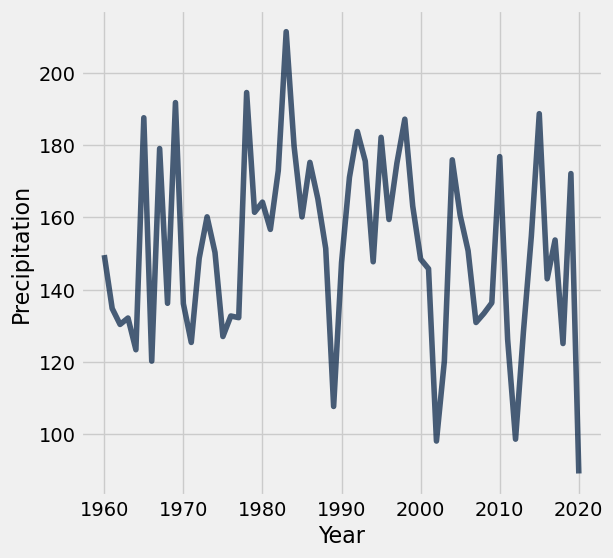

In [54]:
# Just run this cell
totals.plot("Year", "Precipitation")

This plot isn't very revealing. Each year has a different amount of precipitation, and there is quite a bit of variability across years, as if each year's precipitation is a random draw from a distribution of possible outcomes. 

Could it be that these so-called "drought conditions" from 2002-2005 and 2012-2020 can be explained by chance? In other words, could it be that the annual precipitation amounts in the Southwest for these drought years are like **random draws from the same underlying distribution** as for other years? Perhaps nothing about the Earth's precipitation patterns has really changed, and the Southwest U.S. just happened to experience a few dry years close together. 

To assess this idea, let's conduct an A/B test in which **each year's total precipitation** is an outcome, and the condition is **whether or not the year is in the EPA's drought period**.

This `drought_label` function distinguishes between drought years as described in the U.S. EPA statement above (2002-2005 and 2012-2020) and other years. Note that the label "other" is perhaps misleading, since there were other droughts before 2000, such as the massive [1988 drought](https://en.wikipedia.org/wiki/1988%E2%80%9390_North_American_drought) that affected much of the U.S. However, if we're interested in whether these modern drought periods (2002-2005 and 2012-2020) are *normal* or *abnormal*, it makes sense to distinguish the years in this way. 

In [55]:
def drought_label(n):
    """Return the label for an input year n."""
    if 2002 <= n <= 2005 or 2012 <= n <= 2020:
        return 'drought'
    else:
        return 'other'

<!-- BEGIN QUESTION -->

**Question 2.2.** Define null and alternative hypotheses for an A/B test that investigates whether drought years are **drier** (have less precipitation) than other years.

*Note:* Please format your answer using the following structure.

- *Null hypothesis:* ...
- *Alternative hypothesis:* ...


![]("hello.png")

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.3.** First, define the table `drought`. It should contain one row per year and the following two columns:
- `"Label"`: Denotes if a year is part of a `"drought"` year or an `"other"` year
- `"Precipitation"`: The sum of the total precipitation in 13 Southwest cities that year

Then, construct an overlaid histogram of two observed distributions: the total precipitation in drought years and the total precipitation in other years. 

*Note*: Use the provided `bins` when creating your histogram, and do not re-assign the `southwest` table. Feel free to use as many lines as you need!

*Hint*: The optional `group` argument in a certain function might be helpful!


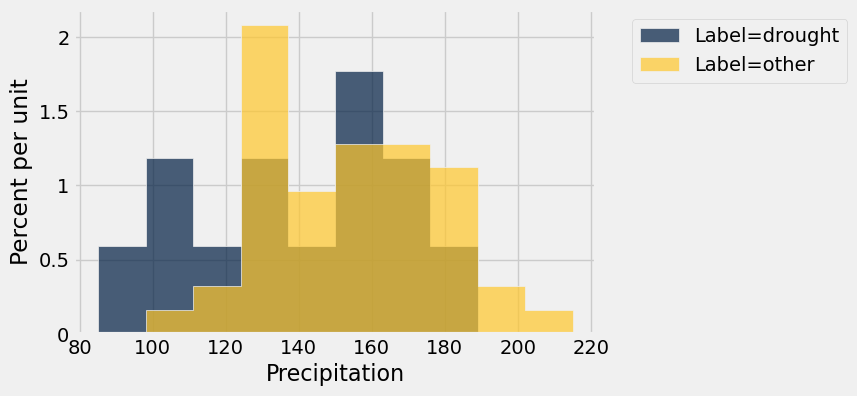

In [56]:
bins = np.arange(85, 215+1, 13)
drought = totals.with_column("Label", totals.apply(drought_label, "Year"))
drought
drought.hist("Precipitation", bins = bins, group = "Label")
# ...

<!-- END QUESTION -->

Before you continue, inspect the histogram you just created and try to guess the conclusion of the A/B test. Building intuition about the result of hypothesis testing from visualizations is quite useful for data science applications. 

**Question 2.4.** Our next step is to choose a test statistic based on our alternative hypothesis in Question 2.2. Which of the following options are valid choices for the test statistic? Assign `ab_test_stat` to **an array of integers** corresponding to valid choices. Assume averages and totals are taken over the total precipitation sums for each year.

1. The difference between the **total** precipitation in **drought** years and the **total** precipitation in **other** years.
2. The difference between the **total** precipitation in **others** years and the **total** precipitation in **drought** years.
3. The **absolute** difference between the **total** precipitation in others years and the **total** precipitation in drought years.
1. The difference between the **average** precipitation in **drought** years and the **average** precipitation in **other** years.
2. The difference between the **average** precipitation in **others** years and the **average** precipitation in **drought** years.
3. The **absolute** difference between the **average** precipitation in others years and the **average** precipitation in drought years.


In [57]:
ab_test_stat = make_array(1)

In [58]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.5.** Fellow climate scientists Will and Nicole point out that there are more **other** years than **drought** years, and so measuring the difference between total precipitation will always favor the **other** years. They conclude that all of the options above involving **total** precipitation are invalid test statistic choices. Do you agree with them? Why or why not?


_Type your answer here, replacing this text._

<!-- END QUESTION -->

Before going on, check your `drought` table. It should have two columns `Label` and `Precipitation` with 61 rows, 13 of which are for `"drought"` years.

In [59]:
drought.show(3)

Year,Precipitation,Label
1960,149.58,other
1961,134.82,other
1962,130.41,other


In [60]:
drought.group('Label')

Label,count
drought,13
other,48


**Question 2.6.** For our A/B test, we'll use the difference between the average precipitation in drought years and the average precipitation in other years as our test statistic:

$$\text{average precipitation in "drought" years} - \text{average precipitation in "other" years}$$

First, complete the function `test_statistic`. It should take in a two-column table `t` with one row per year and two columns:
- `Label`: the label for that year (either `'drought'` or `'other'`)
- `Precipitation`: the total precipitation in the 13 Southwest cities that year. 

Then, use the function you define to assign `observed_statistic` to the observed test statistic.


In [61]:
def test_statistic(t):
    obs = np.average(t.where('Label', are.equal_to('drought')).column('Precipitation')) - np.average(t.where('Label', are.equal_to('other')).column('Precipitation'))
    return obs

observed_statistic = test_statistic(drought)
observed_statistic

-15.856714743589748

In [62]:
grader.check("q2_6")

q2_6 results: All test cases passed!

Now that we have defined our hypotheses and test statistic, we are ready to conduct our hypothesis test. We’ll start by defining a function to simulate the test statistic under the null hypothesis, and then call that function 5,000 times to construct an empirical distribution under the null hypothesis.

**Question 2.7.** Write a function to simulate the test statistic under the null hypothesis. The `simulate_precipitation_null` function should simulate the null hypothesis once (not 5,000 times) and return the value of the test statistic for that simulated sample.

*Hint*: Using `t.with_column(...)` with a column name that already exists in a table `t` will replace that column with the newly specified values.


In [63]:
def simulate_precipitation_null():
    sampled = drought.sample(with_replacement = False).column("Label")
    sampledTable = drought.drop("Label").with_column("Label", sampled)
    stat = test_statistic(sampledTable)
    return stat


# Run your function a couple times to make sure that it works
simulate_precipitation_null()

9.4788141025641153

In [64]:
grader.check("q2_7")

q2_7 results: All test cases passed!

**Question 2.8.** Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 5,000 values of the test statistic under the null hypothesis and store the result in the array `sampled_stats`.

*Hint:* You should use the `simulate_precipitation_null` function you wrote in the previous question!

*Note:* Running this cell may take a few seconds. If it takes more than a minute, try to find a different (faster) way to implement your `simulate_precipitation_null` function.


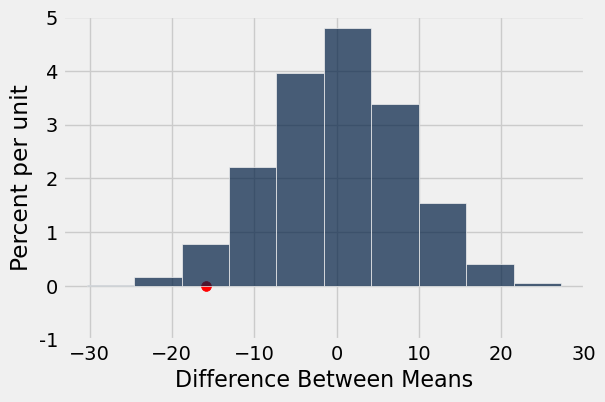

In [65]:
sampled_stats = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    sampled_stats = np.append(sampled_stats, simulate_precipitation_null())

# Do not change these lines
Table().with_column('Difference Between Means', sampled_stats).hist()
plt.scatter(observed_statistic, 0, c="r", s=50);
plt.ylim(-0.01);

In [66]:
grader.check("q2_8")

q2_8 results: All test cases passed!

**Question 2.9.** Compute the p-value for this hypothesis test, and assign it to the variable `precipitation_p_val`.


In [67]:
precipitation_p_val = 0.5
precipitation_p_val

0.5

In [68]:
grader.check("q2_9")

q2_9 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.10.** State a conclusion from this test using a p-value cutoff of 5%. What have you learned about the EPA's statement on drought?


_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.11.** Does your conclusion from Question 2.10 apply to the entire Southwest region of the U.S.? Why or why not?


_Type your answer here, replacing this text._

<!-- END QUESTION -->

## Conclusion

Data science plays a central role in climate change research because massive simulations of the Earth's climate are necessary to assess the implications of climate data recorded from weather stations, satellites, and other sensors. [Berkeley Earth](http://berkeleyearth.org/data/) is a common source of data for these kinds of projects.

In this project, we found ways to apply our statistical inference technqiues that rely on random sampling even in situations where the data were not generated randomly, but instead by some complicated natural process that appeared random. We made assumptions about randomness and then came to conclusions based on those assumptions. Great care must be taken to choose assumptions that are realistic, so that the resulting conclusions are not misleading. However, making assumptions about data can be productive when doing so allows inference techniques to apply to novel situations.

<img src="Lily.png" alt="Picture of a dog on a couch" width="350"/>

**Congratulations -- Lily says you're done with the lab!**



---

You're done with lab!

**Important submission information:** (Self Service Lab Only)
- **Run all the tests** and verify that they all pass
- **Save** from the **File** menu
- **Run the final cell to generate the zip file**
- **Click the link to download the zip file**
- Then, go to [Gradescope](https://www.gradescope.com/courses/546043) and submit the zip file to the corresponding assignment. The name of this assignment is "Lab XX Autograder", where XX is the lab number -- 01, 02, 03, etc.

- If you finish early in Regular Lab, **ask one of the staff members to check you off**.

**It is your responsibility to make sure your work is saved before running the last cell.**


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [69]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q2_1 results: All test cases passed!

    q2_4 results: All test cases passed!

    q2_6 results: All test cases passed!

    q2_7 results: All test cases passed!

    q2_8 results:
        q2_8 - 1 result:
            ❌ Test case failed
            Trying:
                len(sampled_stats) == 5000
            Expecting:
                True
            **********************************************************************
            Line 1, in q2_8 0
            Failed example:
                len(sampled_stats) == 5000
            Exception raised:
                Traceback (most recent call last):
                  File "/opt/conda/lib/python3.9/doctest.py", line 1334, in __run
                    exec(compile(example.source, filename, "single",
                  File "<doctest q2_8 0[0]>", line 1, in <module>
                    len(sam